In [27]:
import os

import signac
import matplotlib.pyplot as plt
import numpy as np
#from utils import lj_potential
#from msibi.utils.smoothing import savitzky_golay
from cmeutils.plotting import savitzky_golay

In [28]:
color_dict = {1.0: "#0F0E0F", 0.9: "#450B0C", 0.8: "#7B0708", 0.7: "#B00405", 0.6: "#E60001"}
colors = ["#0F0E0F", "#7B0708", "#E60001",]

plt.rcParams["figure.figsize"] = (3, 3)
plt.rcParams["axes.labelsize"] = 12
plt.rcParams["legend.fontsize"] = 7
plt.rcParams['lines.markersize'] = 2
plt.rcParams["lines.linestyle"] = "-"
plt.rcParams["lines.marker"] = "o"
plt.rcParams["lines.linewidth"] = 1
plt.rcParams["figure.dpi"] = 1200
#plt.rcParams[""]

In [29]:
# Matplotlib RC Params:    
color_dict = {1.0: "#0F0E0F", 0.8: "#666666", 0.7: "#964d4d", 0.6: "#d03f3f"}
symbol_dict = {1.0: "o", 0.8: "s", 0.7: "^", 0.6: "d"}
pair_symbol_dict = {"E-E": "o", "K-K": "s", "E-K": "^"}
pair_colors = {"E-E": "#00A866", "K-K": "#008EA8", "E-K": "#F5AD18"}
plt.rcParams["figure.figsize"] = (3, 3)
plt.rcParams["axes.labelsize"] = 12
plt.rcParams["legend.fontsize"] = 7
plt.rcParams['lines.markersize'] = 1
plt.rcParams["lines.linestyle"] = "-"
plt.rcParams["lines.linewidth"] = 1
plt.rcParams["figure.dpi"] = 1200
plt.rcParams["legend.markerscale"] = 3

In [30]:
def zero_tail(potential):
    adj_potential = np.copy(potential)
    neg_indices = np.where(adj_potential <= 0)[0]
    well_indices = []
    for idx, num in enumerate(neg_indices):
        try:
            if num == neg_indices[idx + 1] - 1:
                well_indices.append(num)
            else:
                break
        except:
            pass
    adj_potential[well_indices[-1] + 1:] = 0
    smoothed = savitzky_golay(adj_potential, window_size=5, order=1)
    return smoothed

In [31]:
project = signac.get_project("../msibi-runs/pairs-6.5kT/")

In [32]:
sp_filter = {
    "n_steps": 5000000.0,
    "smoothing_window": 5
}

doc_filter = {
    "done": True,
    #"dihedrals": True,
    #"dihedral_form": "file",
    #"bond_form": "file",
    #"bond_strength": "stiff"
}

In [42]:
pairs = ["E-E", "K-K", "E-K"]
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

fpath = "/home/chrisjones4/cme/forks/polybinder/polybinder/library/forcefields/rmax_4_angles2/"
for idx, pair in enumerate(pairs):
    data = np.loadtxt(os.path.join(fpath, f"{pair}_pair.txt"))
    ax[idx].plot(data[:,0], data[:,1], "k^-", label="Original")

for job in project.find_jobs(sp_filter, doc_filter):
    for i, pair in enumerate(pairs):
        pair_pot = np.loadtxt(job.fn(f"{pair}_final.txt"))
        ax[i].plot(pair_pot[:,0], pair_pot[:,1], label=job.sp.n_steps)
        ax[i].plot(pair_pot[:,0], [0 for i in pair_pot[:,0]], "k--")
        ax[i].set_title(pair)
        ax[i].set_ylim([-4, 5])
        ax[i].set_xlim(1,4)
        ax[i].legend()
    print(job.sp.n_steps, job.id)
    print()
        


5000000.0 cf6f340fd41d9f9119443c10dc659a95

1000000.0 b0a23d31f30e96810cc01f23a4fe909f



# Looking at the final pair potentials:

cf6f340fd41d9f9119443c10dc659a95


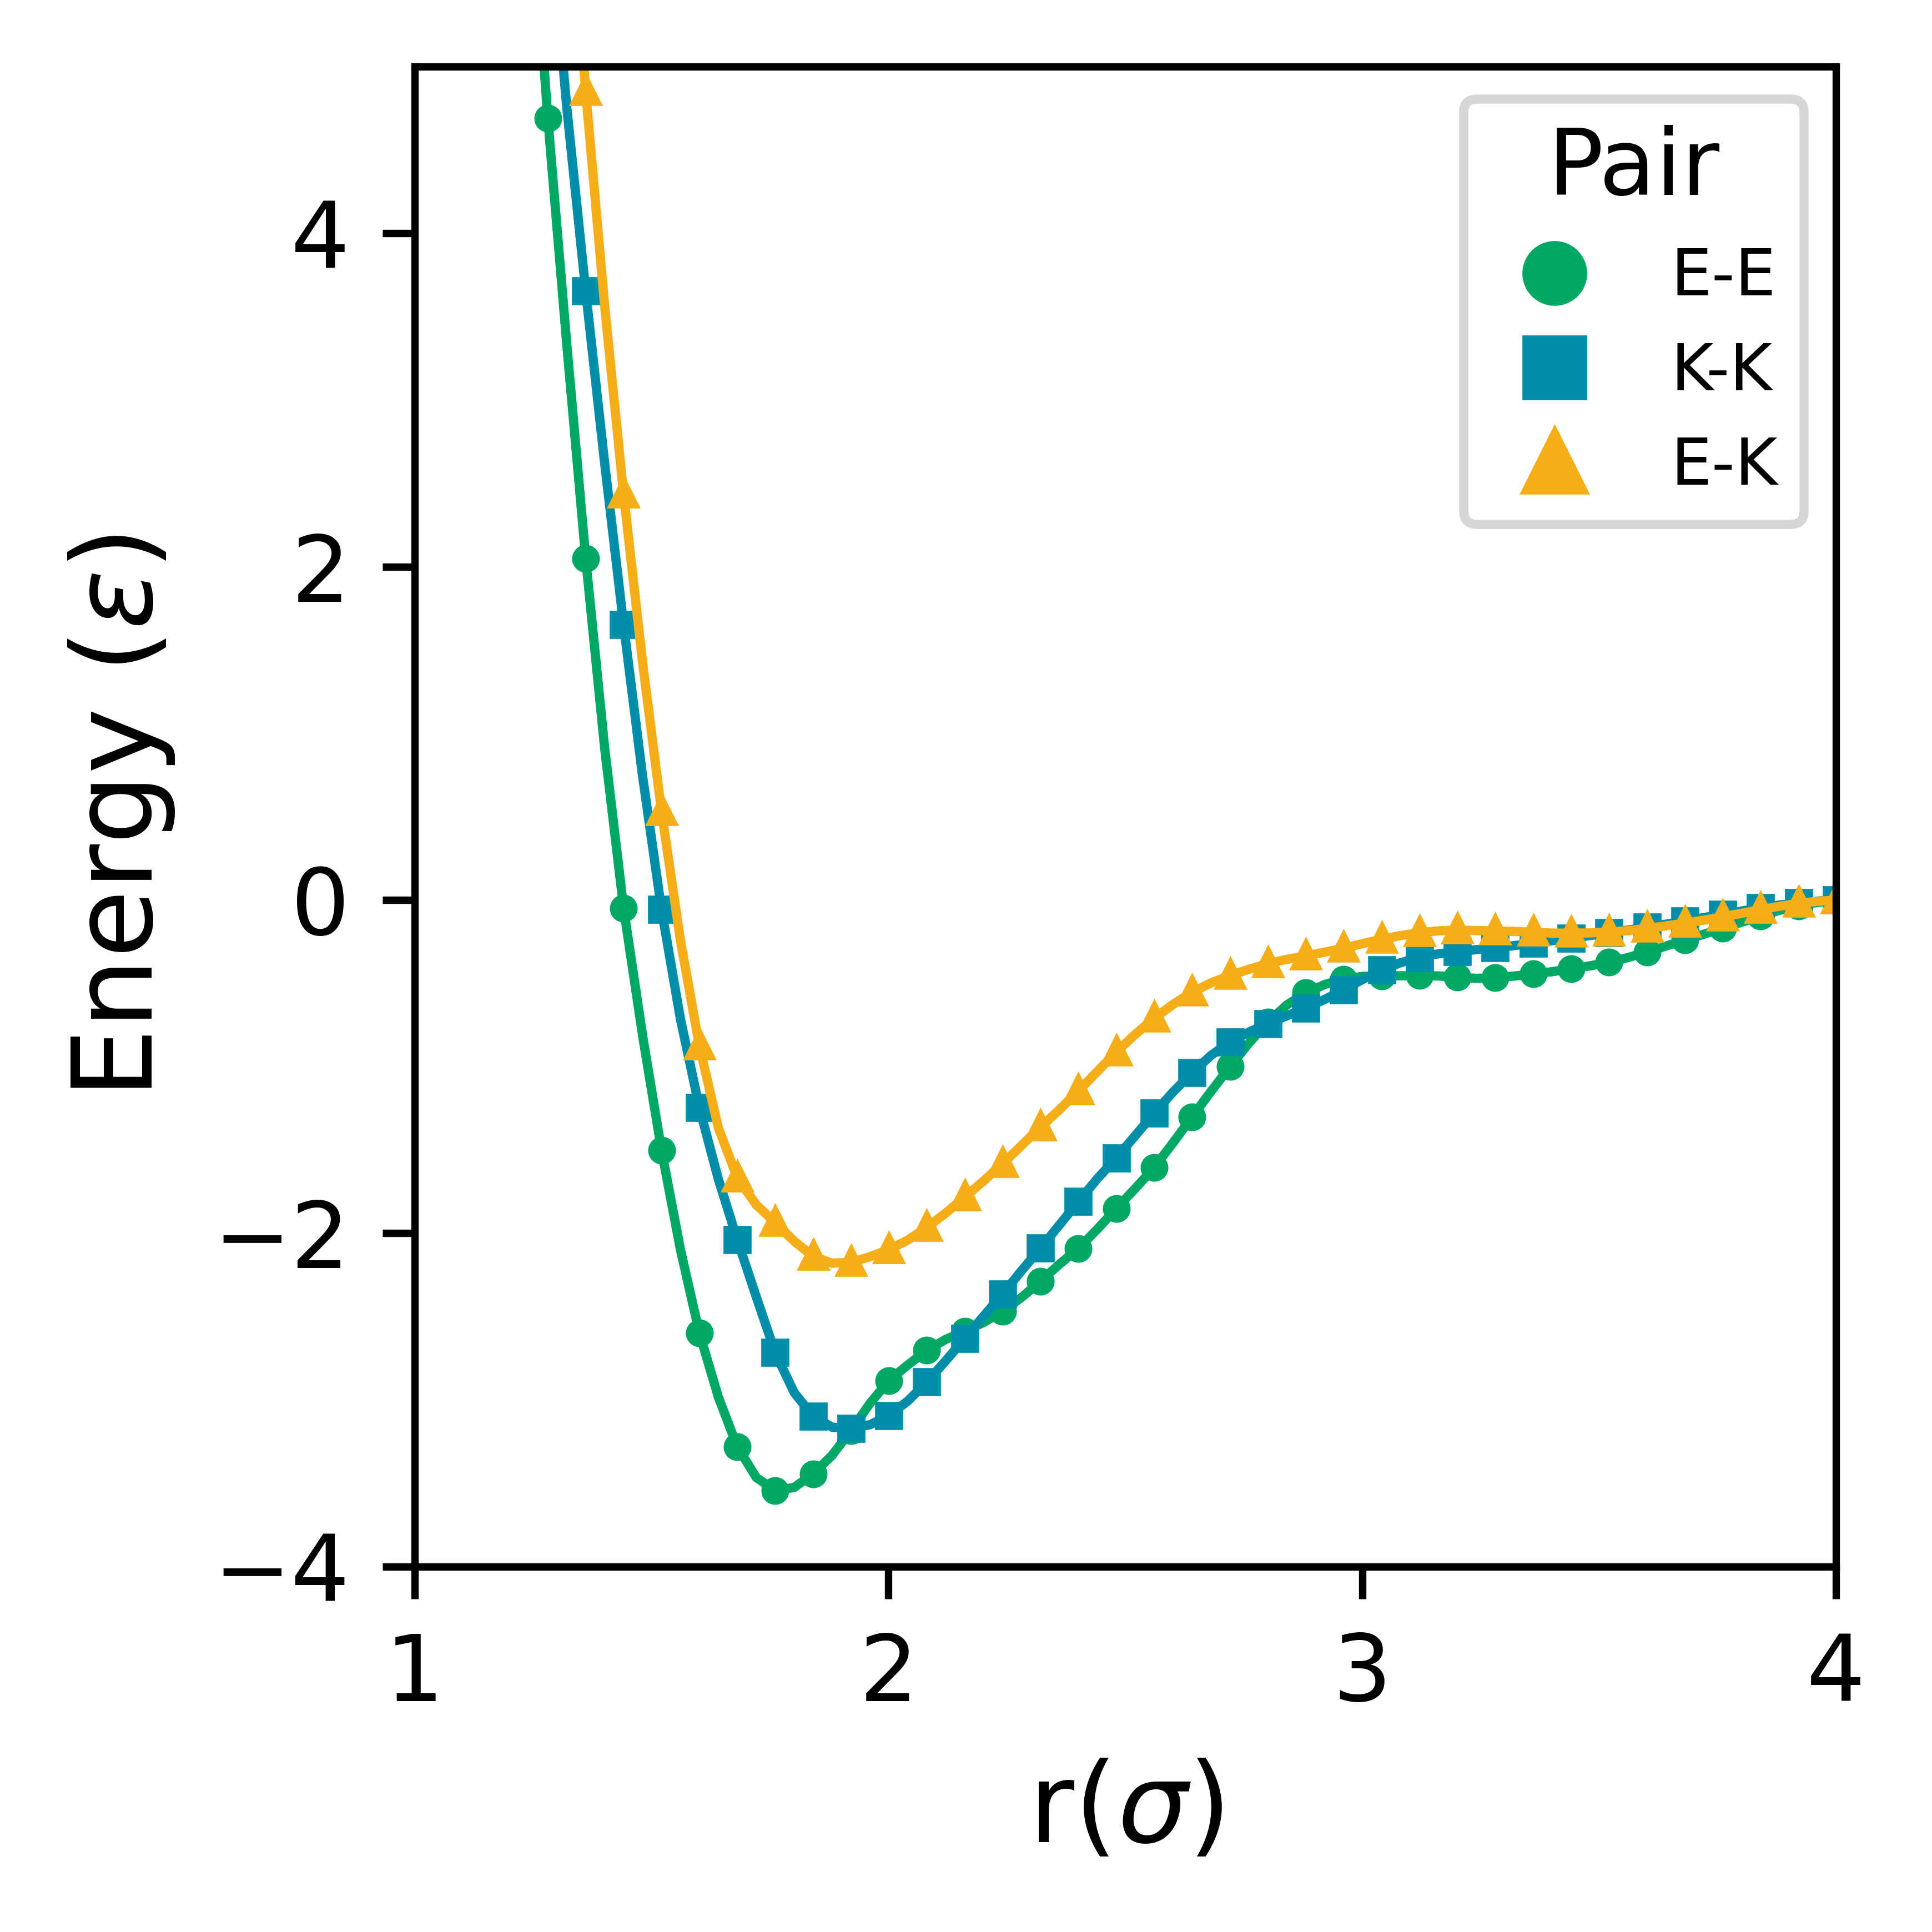

In [40]:
pairs = [
    "E-E",
    "K-K",
    "E-K"
]

fig = plt.figure()
for job in project.find_jobs(sp_filter, doc_filter):
    if int(job.sp.dihedrals[1]["kwargs"]["k"]) == 13:
        continue
    for i, pair in enumerate(pairs):
        pair_pot = np.loadtxt(job.fn(f"{pair}_final.txt"))
        smoothed = savitzky_golay(pair_pot[:,1], window_size=7, order=1)
        plt.plot(
            pair_pot[:,0],
            pair_pot[:,1],
            #label=pair,
            c=pair_colors[pair],
            markersize=0
        )        
        stride = np.arange(0, len(pair_pot[:,0]), 2)
        plt.plot(
            pair_pot[:,0][stride],
            pair_pot[:,1][stride],
            label=pair,
            c=pair_colors[pair],
            marker=pair_symbol_dict[pair],
            markersize=2,
            linewidth=0
        )
        
#for job in project2.find_jobs(sp_filter, doc_filter):
#    for i, pair in enumerate(pairs):
#        pair_pot = np.loadtxt(job.fn(f"{pair}_smoothed.txt"))
#        smoothed = savitzky_golay(pair_pot[:,1], window_size=7, order=1)
#        plt.plot(pair_pot[:,0], pair_pot[:,1], label=pair, c=colors[i], ls="--", marker="x")
#
plt.legend(title="Pair")
#plt.ylim(-2, 5)
#plt.xlim(1, 5)
print(job)
plt.ylim(-4, 5)
plt.xlim(1, 4)

plt.ylabel("Energy ($\epsilon$)")
#plt.title("MSIBI Pair Potentials")
plt.xlabel("r($\sigma$)")
fig.tight_layout()
plt.savefig("cg_pair_potentials.png")
plt.show()

## Potential of a Specific Iteration:

In [ ]:
pairs = ["E-E", "K-K", "E-K"]
fig, ax = plt.subplots(1, 3, figsize=(12, 6))
iteration=20

for job in project.find_jobs(sp_filter, doc_filter):
    for i, pair in enumerate(pairs):
        pair_pot_final = np.loadtxt(job.fn(f"{pair}_smoothed.txt"))
        pair_pot = np.loadtxt(job.fn(f"step{iteration-1}.pair_pot.{pair}.txt"))
        #ax[i].plot(pair_pot[:,0], pair_pot[:,2], label="Force")
        smoothed = savitzky_golay(pair_pot[:,1], window_size=5, order=1)
        ax[i].plot(pair_pot[:,0], pair_pot[:,1])
        ax[i].plot(pair_pot[:,0], smoothed)
        ax[i].plot(pair_pot[:,0], [0 for i in pair_pot[:,0]], "k--")
        ax[i].set_title(pair)
        ax[i].set_ylim([-4, 5])
        ax[i].set_xlim(1, 4)
        ax[i].legend()

{'name': 'D', 'kT': 6.5, 'target_trajectory': '6.5kT-1.27den.gsd', 'max_frames': 100, 'target_frames': 200, 'alpha': 1.0, 'exclude_bonded': True}


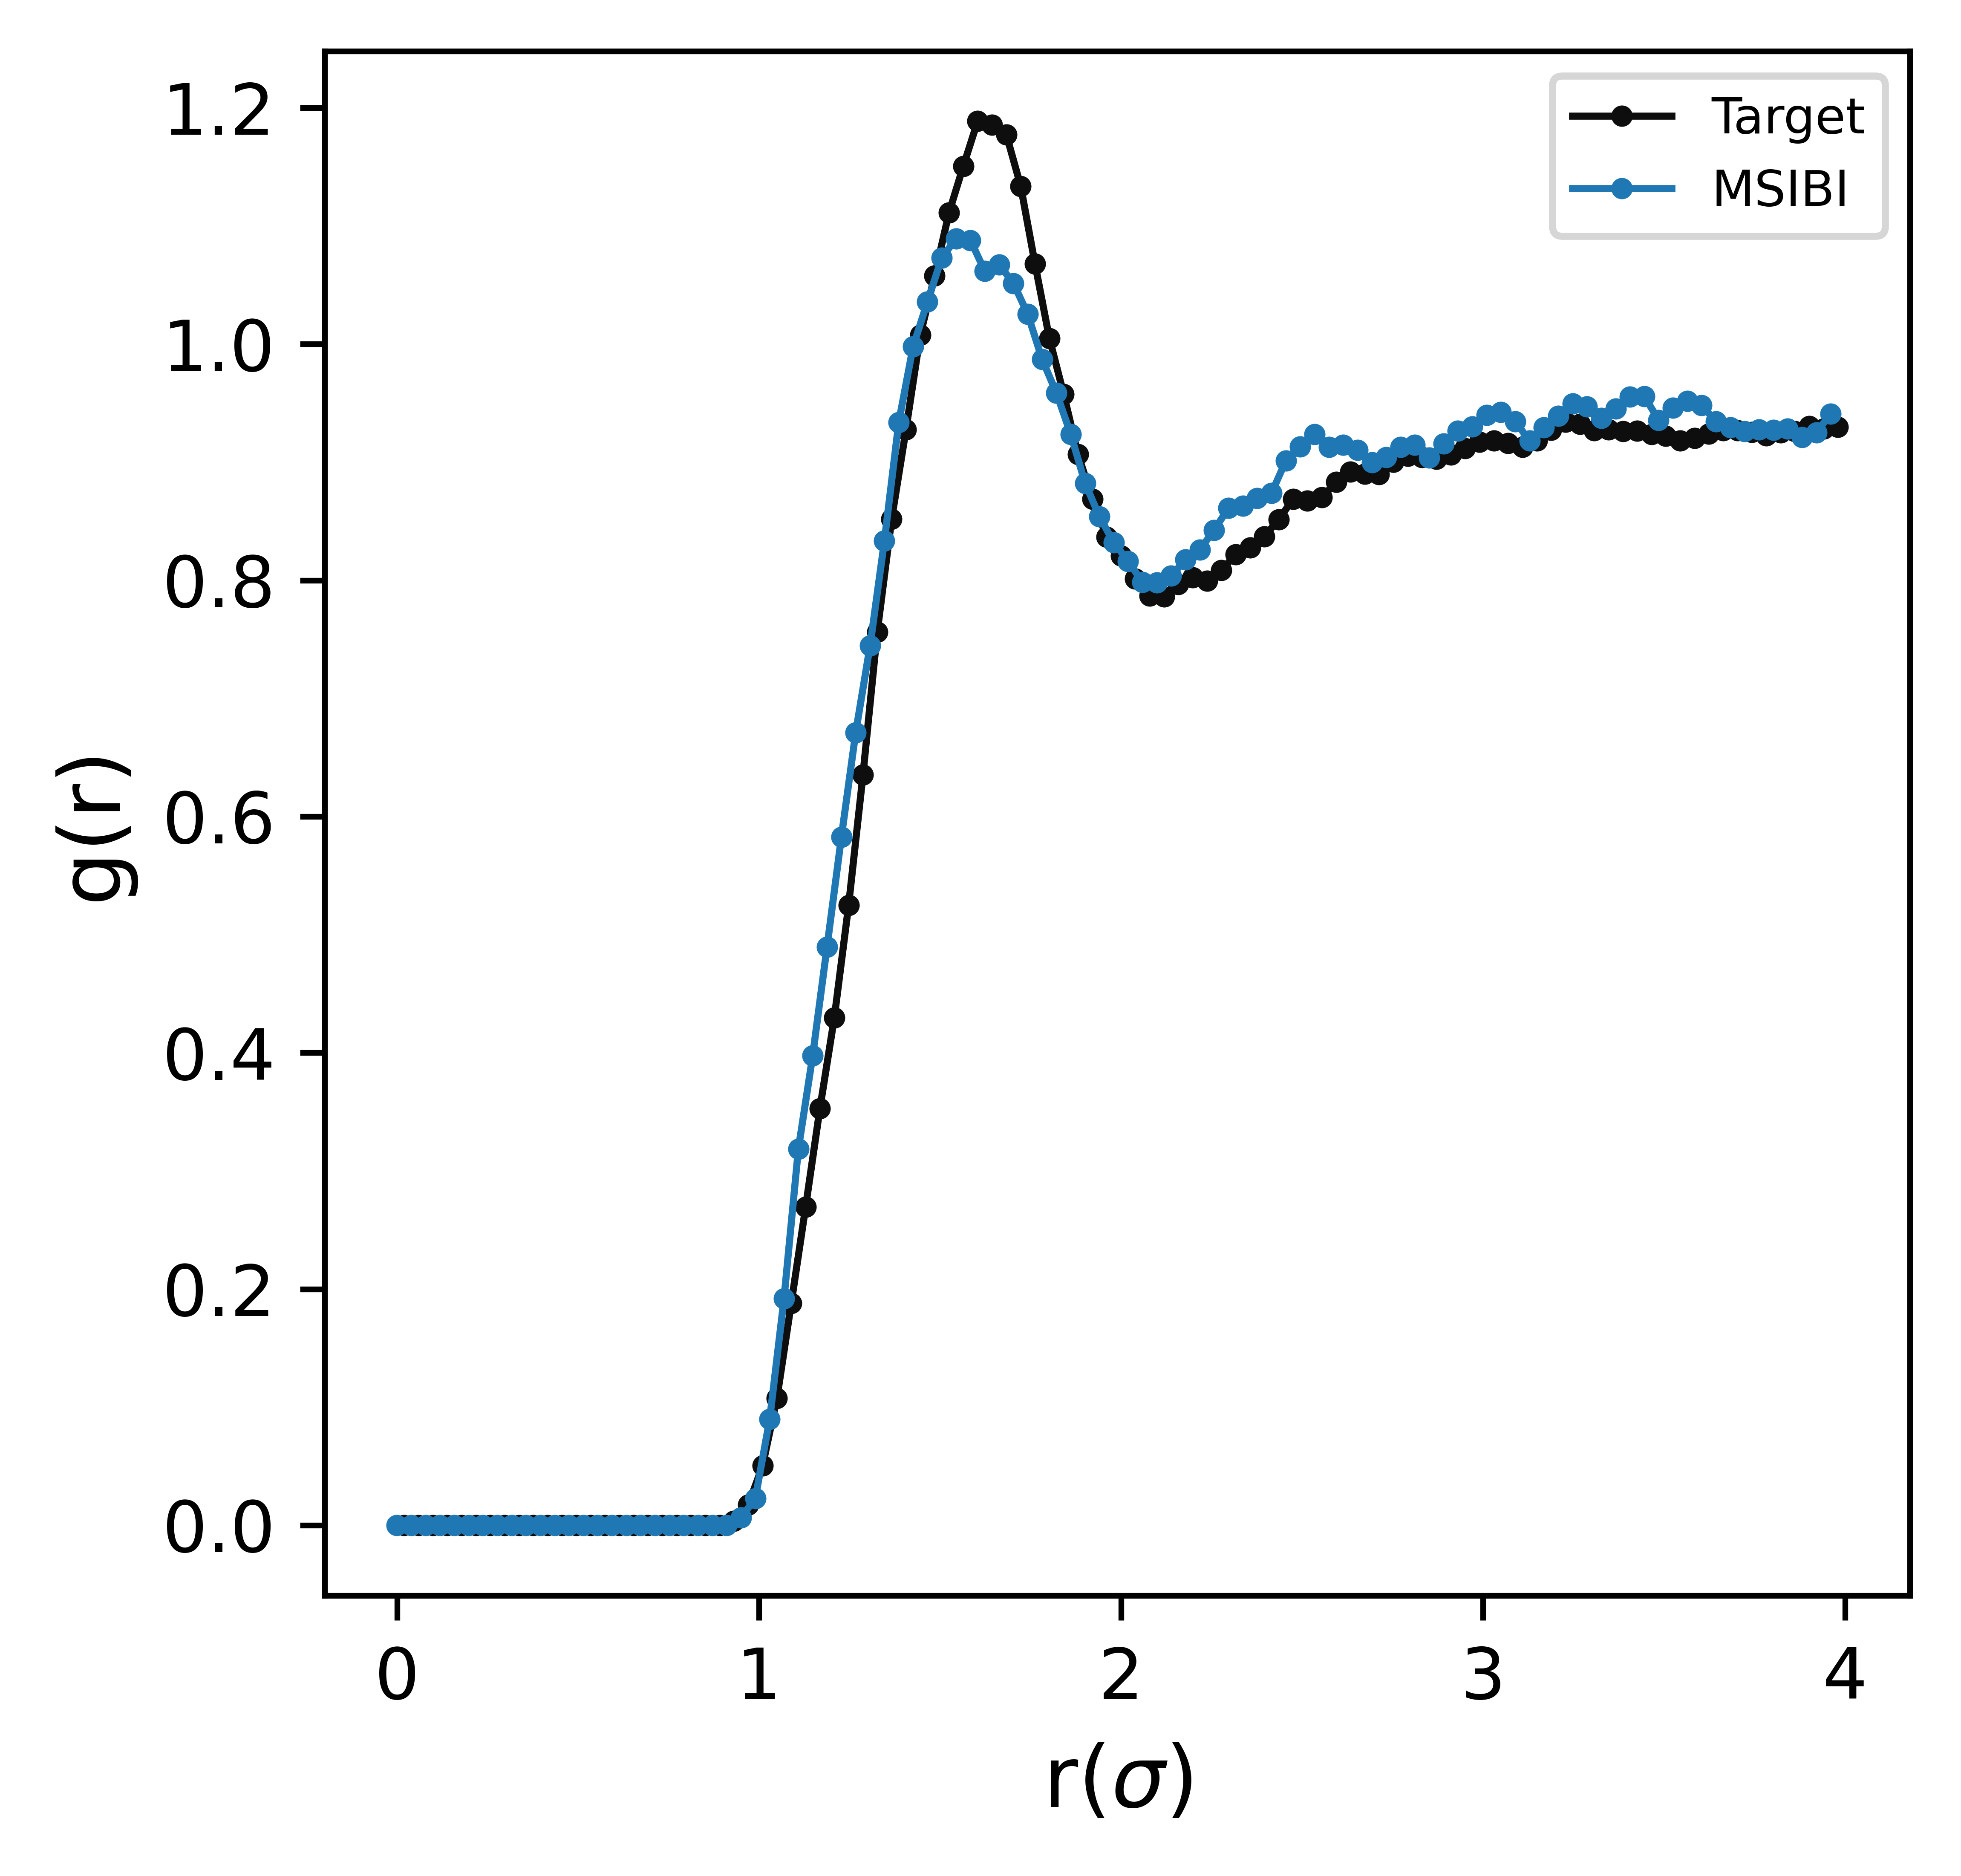

In [34]:
pair = "E-E"
state_num = 3
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
target_plotted = False
iteration = 20
iteration2 = 40

for job in project2.find_jobs(sp_filter, doc_filter):
    for i, state in enumerate(job.sp.states):
        if i != state_num:
            continue
        print(state)
        name = state["name"]
        kT = state["kT"]
        target_rdf_path = job.fn(f"states/{name}_{kT}/pair_rdf_{pair}-state_{name}-target.txt")
        last_rdf_path = job.fn(f"states/{name}_{kT}/pair_rdf_{pair}-state_{name}-step{iteration-1}.txt")
        target_rdf = np.loadtxt(target_rdf_path)
        last_rdf = np.loadtxt(last_rdf_path)
        if target_plotted is False:
            ax.plot(
                target_rdf[:,0],
                target_rdf[:, 1],
                label=f"Target",
                #linestyle="dashed",
                color=colors[0]
            )
        ax.plot(
            last_rdf[:,0],
            last_rdf[:, 1],
            label="MSIBI",
            #color="#d03f3f"
        )
        density = state["target_trajectory"][-11:-7]
        ax.legend()
        ax.set_xlabel("r($\sigma$)")
        ax.set_ylabel("g(r)")
        #ax[i].set_title(f"Pair {pair}: {density}g/cm^3, {state['kT']} kT")
    #target_plotted = True
    

# Looking at RDFs

{'name': 'C', 'kT': 5.0, 'target_trajectory': '5.0kT-1.38den.gsd', 'max_frames': 100, 'target_frames': 200, 'alpha': 1.0, 'exclude_bonded': True}


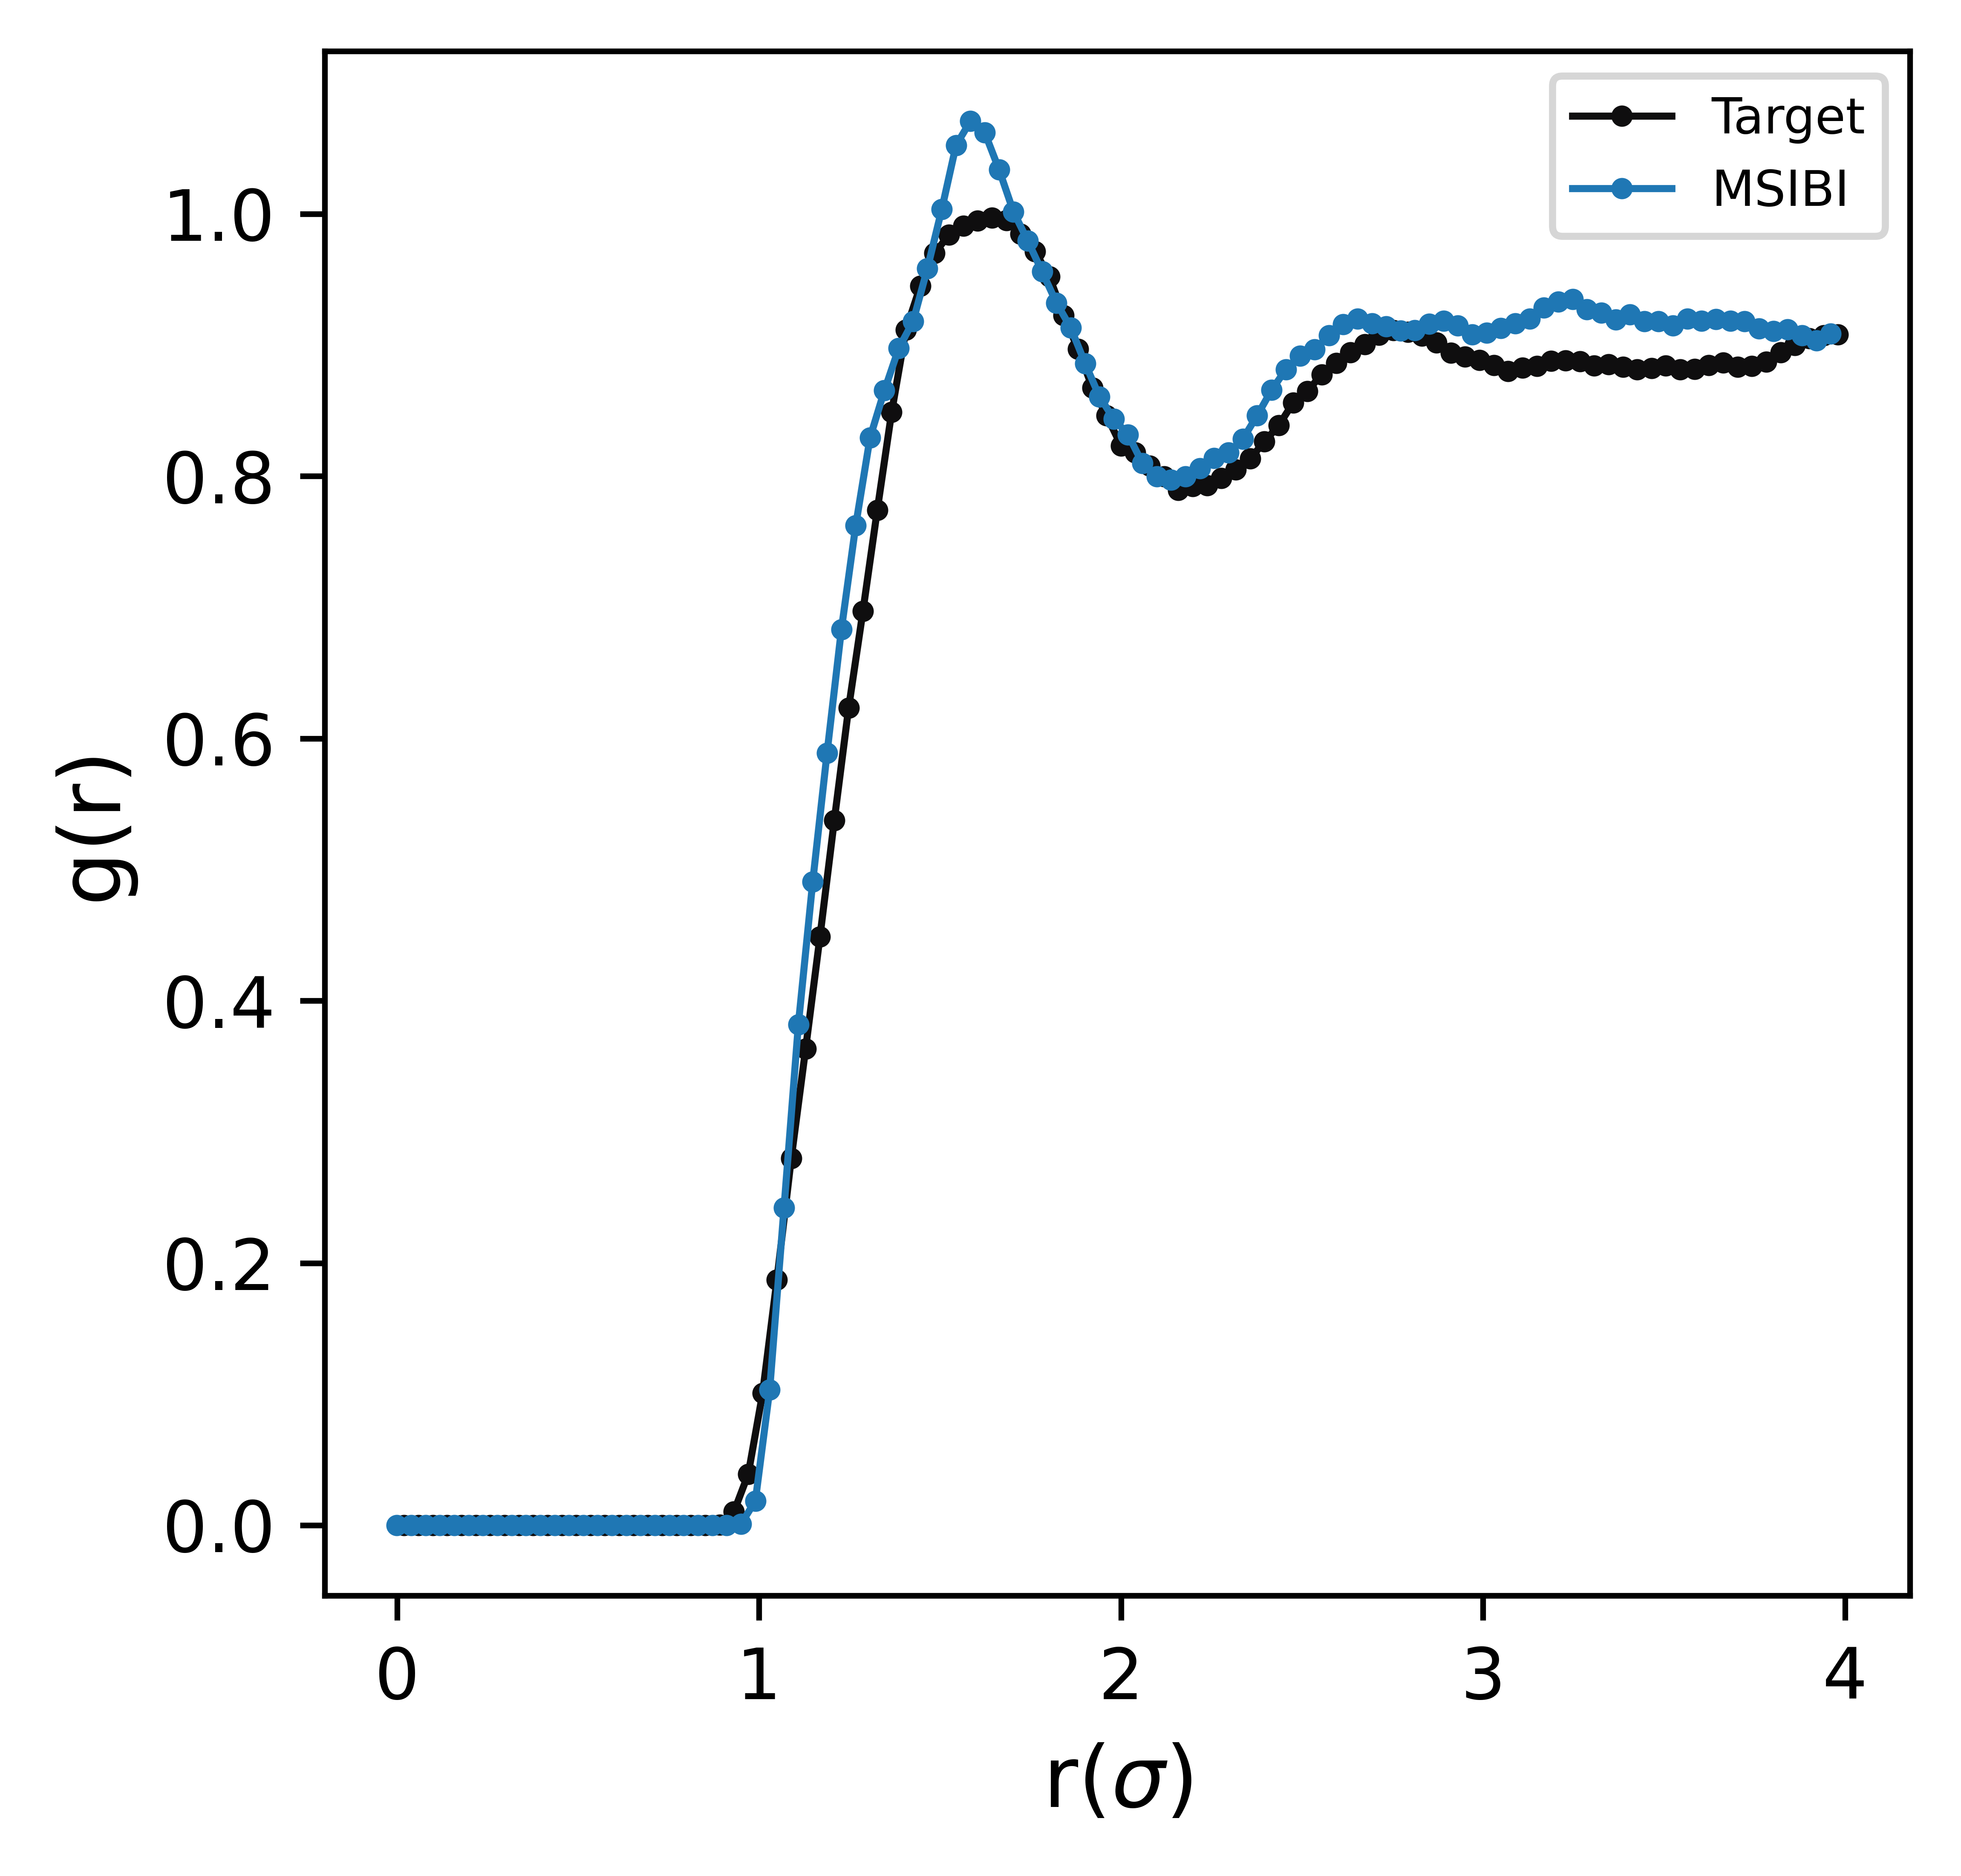

In [36]:
pair = "K-K"
state_num = 2
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
target_plotted = False
iteration = 20
iteration2 = 40

for job in project2.find_jobs(sp_filter, doc_filter):
    for i, state in enumerate(job.sp.states):
        if i != state_num:
            continue
        print(state)
        name = state["name"]
        kT = state["kT"]
        target_rdf_path = job.fn(f"states/{name}_{kT}/pair_rdf_{pair}-state_{name}-target.txt")
        last_rdf_path = job.fn(f"states/{name}_{kT}/pair_rdf_{pair}-state_{name}-step{iteration-1}.txt")
        target_rdf = np.loadtxt(target_rdf_path)
        last_rdf = np.loadtxt(last_rdf_path)
        if target_plotted is False:
            ax.plot(
                target_rdf[:,0],
                target_rdf[:, 1],
                label=f"Target",
                #linestyle="dashed",
                color=colors[0]
            )
        ax.plot(
            last_rdf[:,0],
            last_rdf[:, 1],
            label="MSIBI",
            #color="#d03f3f"
        )
        density = state["target_trajectory"][-11:-7]
        ax.legend()
        ax.set_xlabel("r($\sigma$)")
        ax.set_ylabel("g(r)")
        #ax[i].set_title(f"Pair {pair}: {density}g/cm^3, {state['kT']} kT")
    target_plotted = True
    

{'name': 'A', 'kT': 6.5, 'target_trajectory': 'two-chains.gsd', 'max_frames': 150, 'target_frames': 200, 'exclude_bonded': False}
{'name': 'B', 'kT': 5.0, 'target_trajectory': '5.0kT-1.27den.gsd', 'max_frames': 100, 'target_frames': 200, 'exclude_bonded': True}
{'name': 'C', 'kT': 5.0, 'target_trajectory': '5.0kT-1.38den.gsd', 'max_frames': 100, 'target_frames': 200, 'alpha': 1.0, 'exclude_bonded': True}
{'name': 'D', 'kT': 6.5, 'target_trajectory': '6.5kT-1.27den.gsd', 'max_frames': 100, 'target_frames': 200, 'alpha': 1.0, 'exclude_bonded': True}


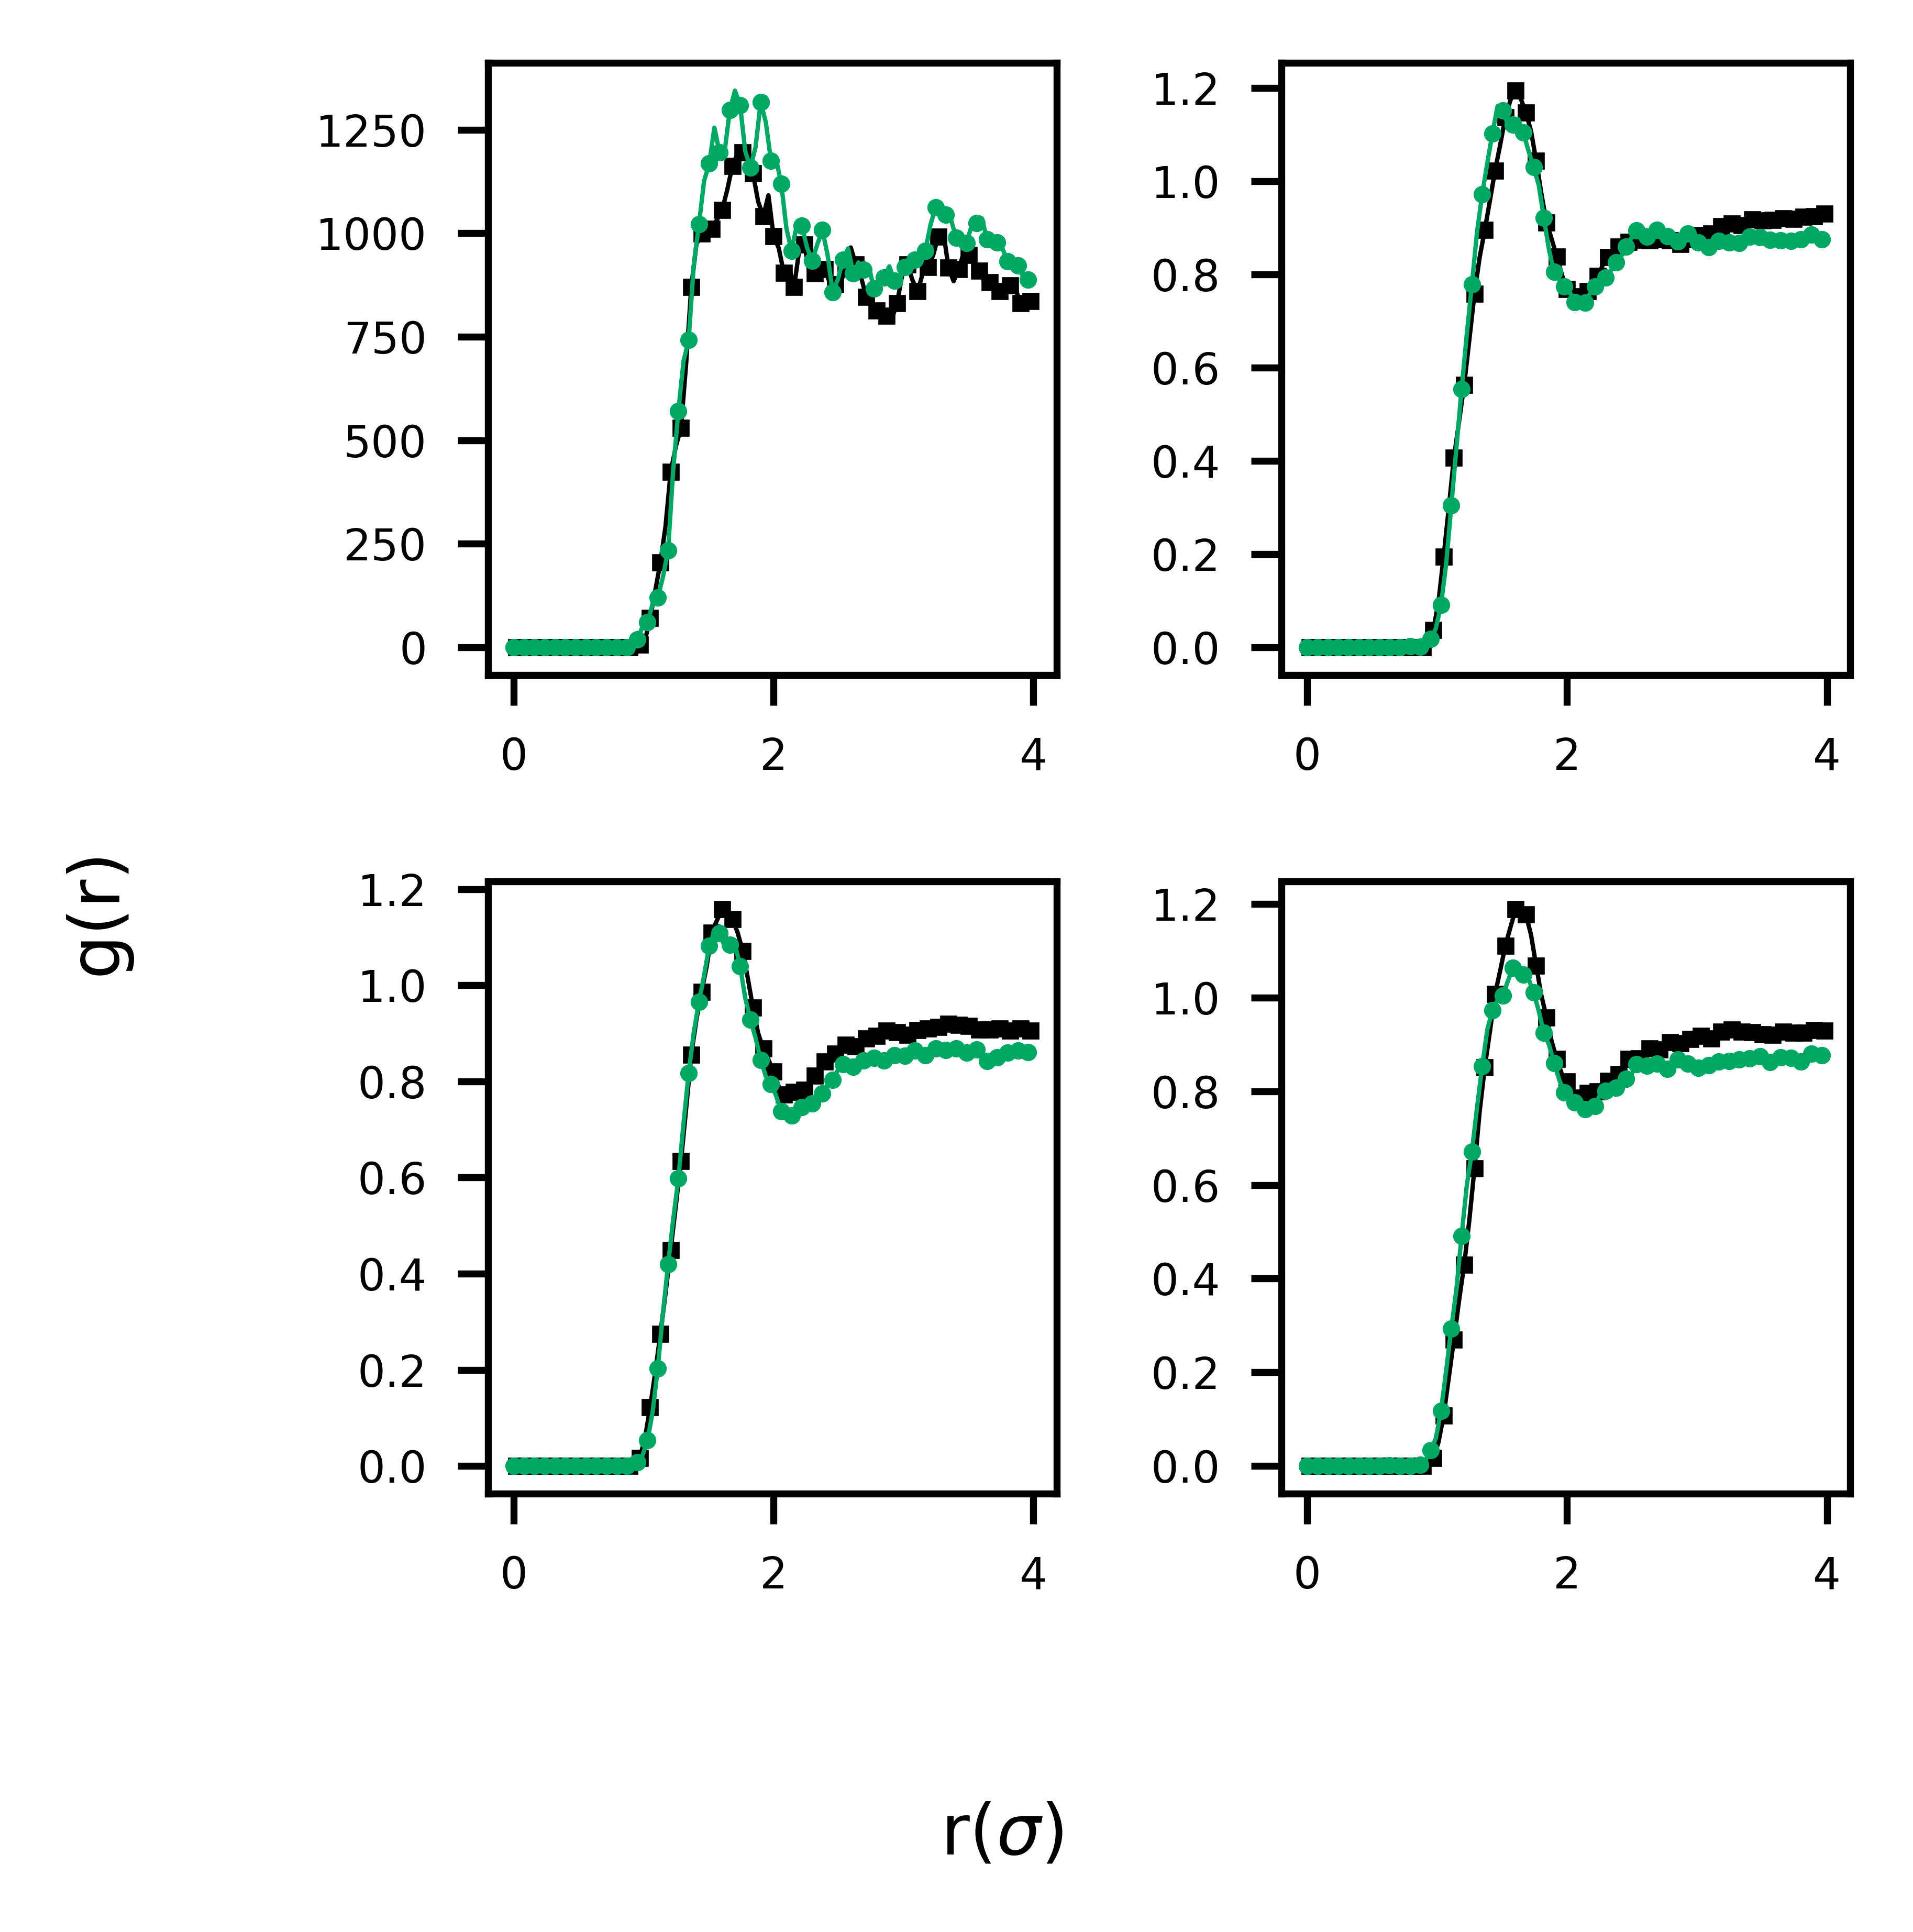

In [55]:
pair = "E-E"
state_num = 0
#plt.rcParams["axes.labelsize"] = 5


fig, ax = plt.subplots(2, 2, figsize=(3,3)) # figsize=(12, 4))

target_plotted = False

for job in project.find_jobs(sp_filter, doc_filter):
    iteration = job.sp.iterations
    for i, state in enumerate(job.sp.states):
        name = state["name"]
        kT = state["kT"]
        target_rdf_path = job.fn(f"states/{name}_{kT}/pair_rdf_{pair}-state_{name}-target.txt")
        last_rdf_path = job.fn(f"states/{name}_{kT}/pair_rdf_{pair}-state_{name}-step{iteration-1}.txt")
        target_rdf = np.loadtxt(target_rdf_path)
        last_rdf = np.loadtxt(last_rdf_path)
        if i < 2:
            j=0
        else:
            i -= 2
            j=1
        if target_plotted is False:
            ax[i][j].plot(
                target_rdf[:,0],
                target_rdf[:, 1],
                label=f"U.A. Target",
                #linestyle="dashed",
                color="k",
                marker="s",
                markersize=0,
                linewidth=0.5
            )
            
            stride = np.arange(0, len(target_rdf[:,0]), 2)
            ax[i][j].plot(
                target_rdf[:,0][stride],
                target_rdf[:, 1][stride],
                label=f"U.A. Target",
                color="k",
                marker="s",
                markersize=1,
                linewidth=0
            )
            
        ax[i][j].plot(
            last_rdf[:,0],
            last_rdf[:, 1],
            label="C.G. Model",
            color=pair_colors[pair],
            marker="o",
            markersize=0,
            linewidth=0.5
        )
        stride = np.arange(0, len(last_rdf[:,0]), 2)
        ax[i][j].plot(
                last_rdf[:,0][stride],
                last_rdf[:, 1][stride],
                label="C.G. Model",
                color=pair_colors[pair],
                marker="o",
                markersize=1,
                linewidth=0,
                #alpha=0.8
            )
        
        
        ax[i][j].tick_params(axis='both', labelsize=5)
        print(state)
        
fig.supylabel('g(r)', fontsize=8, ha="center", va="center")
fig.supxlabel('r($\sigma$)', fontsize=8, ha="center", va="center")
plt.tight_layout()

$f_{fit} = 0.945$

In [54]:
help(ax[0][0].set_xticks(fontsize=10))

TypeError: set_ticks() missing 1 required positional argument: 'ticks'

In [57]:
pair = "E-E"
state_num = 0

fig, ax = plt.subplots(1, 4, figsize=(12, 4))
target_plotted = False

for job in project.find_jobs(sp_filter, doc_filter):
    if job.sp.iterations == 20:
        iteration = 20
        
    for i, state in enumerate(job.sp.states):
        name = state["name"]
        kT = state["kT"]
        target_rdf_path = job.fn(f"states/{name}_{kT}/pair_rdf_{pair}-state_{name}-target.txt")
        last_rdf_path = job.fn(f"states/{name}_{kT}/pair_rdf_{pair}-state_{name}-step{iteration-1}.txt")
        target_rdf = np.loadtxt(target_rdf_path)
        last_rdf = np.loadtxt(last_rdf_path)
        if target_plotted is False:
            ax[i].plot(
                target_rdf[:,0],
                target_rdf[:, 1],
                label=f"Target",
                #linestyle="dashed",
                color=colors[0]
            )
        ax[i].plot(
            last_rdf[:,0],
            last_rdf[:, 1],
            label='MSIBI',
            color="#d03f3f"
        )
        density = state["target_trajectory"][-11:-7]
        ax[i].legend()
        ax[i].set_xlabel("r($\sigma$)")
        ax[i].set_ylabel("g(r)")
        if i != 0:
            ax[i].set_title(f"Pair {pair}: {density}g/cm^3, {state['kT']} kT", fontsize=9)
        else:
            ax[i].set_title("2 Chain State")
    #target_plotted = True

In [58]:
pair = "E-K"
state_num = 0

fig, ax = plt.subplots(1, 4, figsize=(12, 4))
target_plotted = False

for job in project.find_jobs(sp_filter, doc_filter):
    if job.sp.iterations == 20:
        iteration = 20
        
    for i, state in enumerate(job.sp.states):
        name = state["name"]
        kT = state["kT"]
        target_rdf_path = job.fn(f"states/{name}_{kT}/pair_rdf_{pair}-state_{name}-target.txt")
        last_rdf_path = job.fn(f"states/{name}_{kT}/pair_rdf_{pair}-state_{name}-step{iteration-1}.txt")
        target_rdf = np.loadtxt(target_rdf_path)
        last_rdf = np.loadtxt(last_rdf_path)
        if target_plotted is False:
            ax[i].plot(
                target_rdf[:,0],
                target_rdf[:, 1],
                label=f"Target",
                #linestyle="dashed",
                color=colors[0]
            )
        ax[i].plot(
            last_rdf[:,0],
            last_rdf[:, 1],
            label='MSIBI',
            color="#d03f3f"
        )
        density = state["target_trajectory"][-11:-7]
        ax[i].legend()
        ax[i].set_xlabel("r($\sigma$)")
        ax[i].set_ylabel("g(r)")
        if i != 0:
            ax[i].set_title(f"Pair {pair}: {density}g/cm^3, {state['kT']} kT", fontsize=9)
        else:
            ax[i].set_title("2 Chain State")
    #target_plotted = True

(-5.0, 5.0)

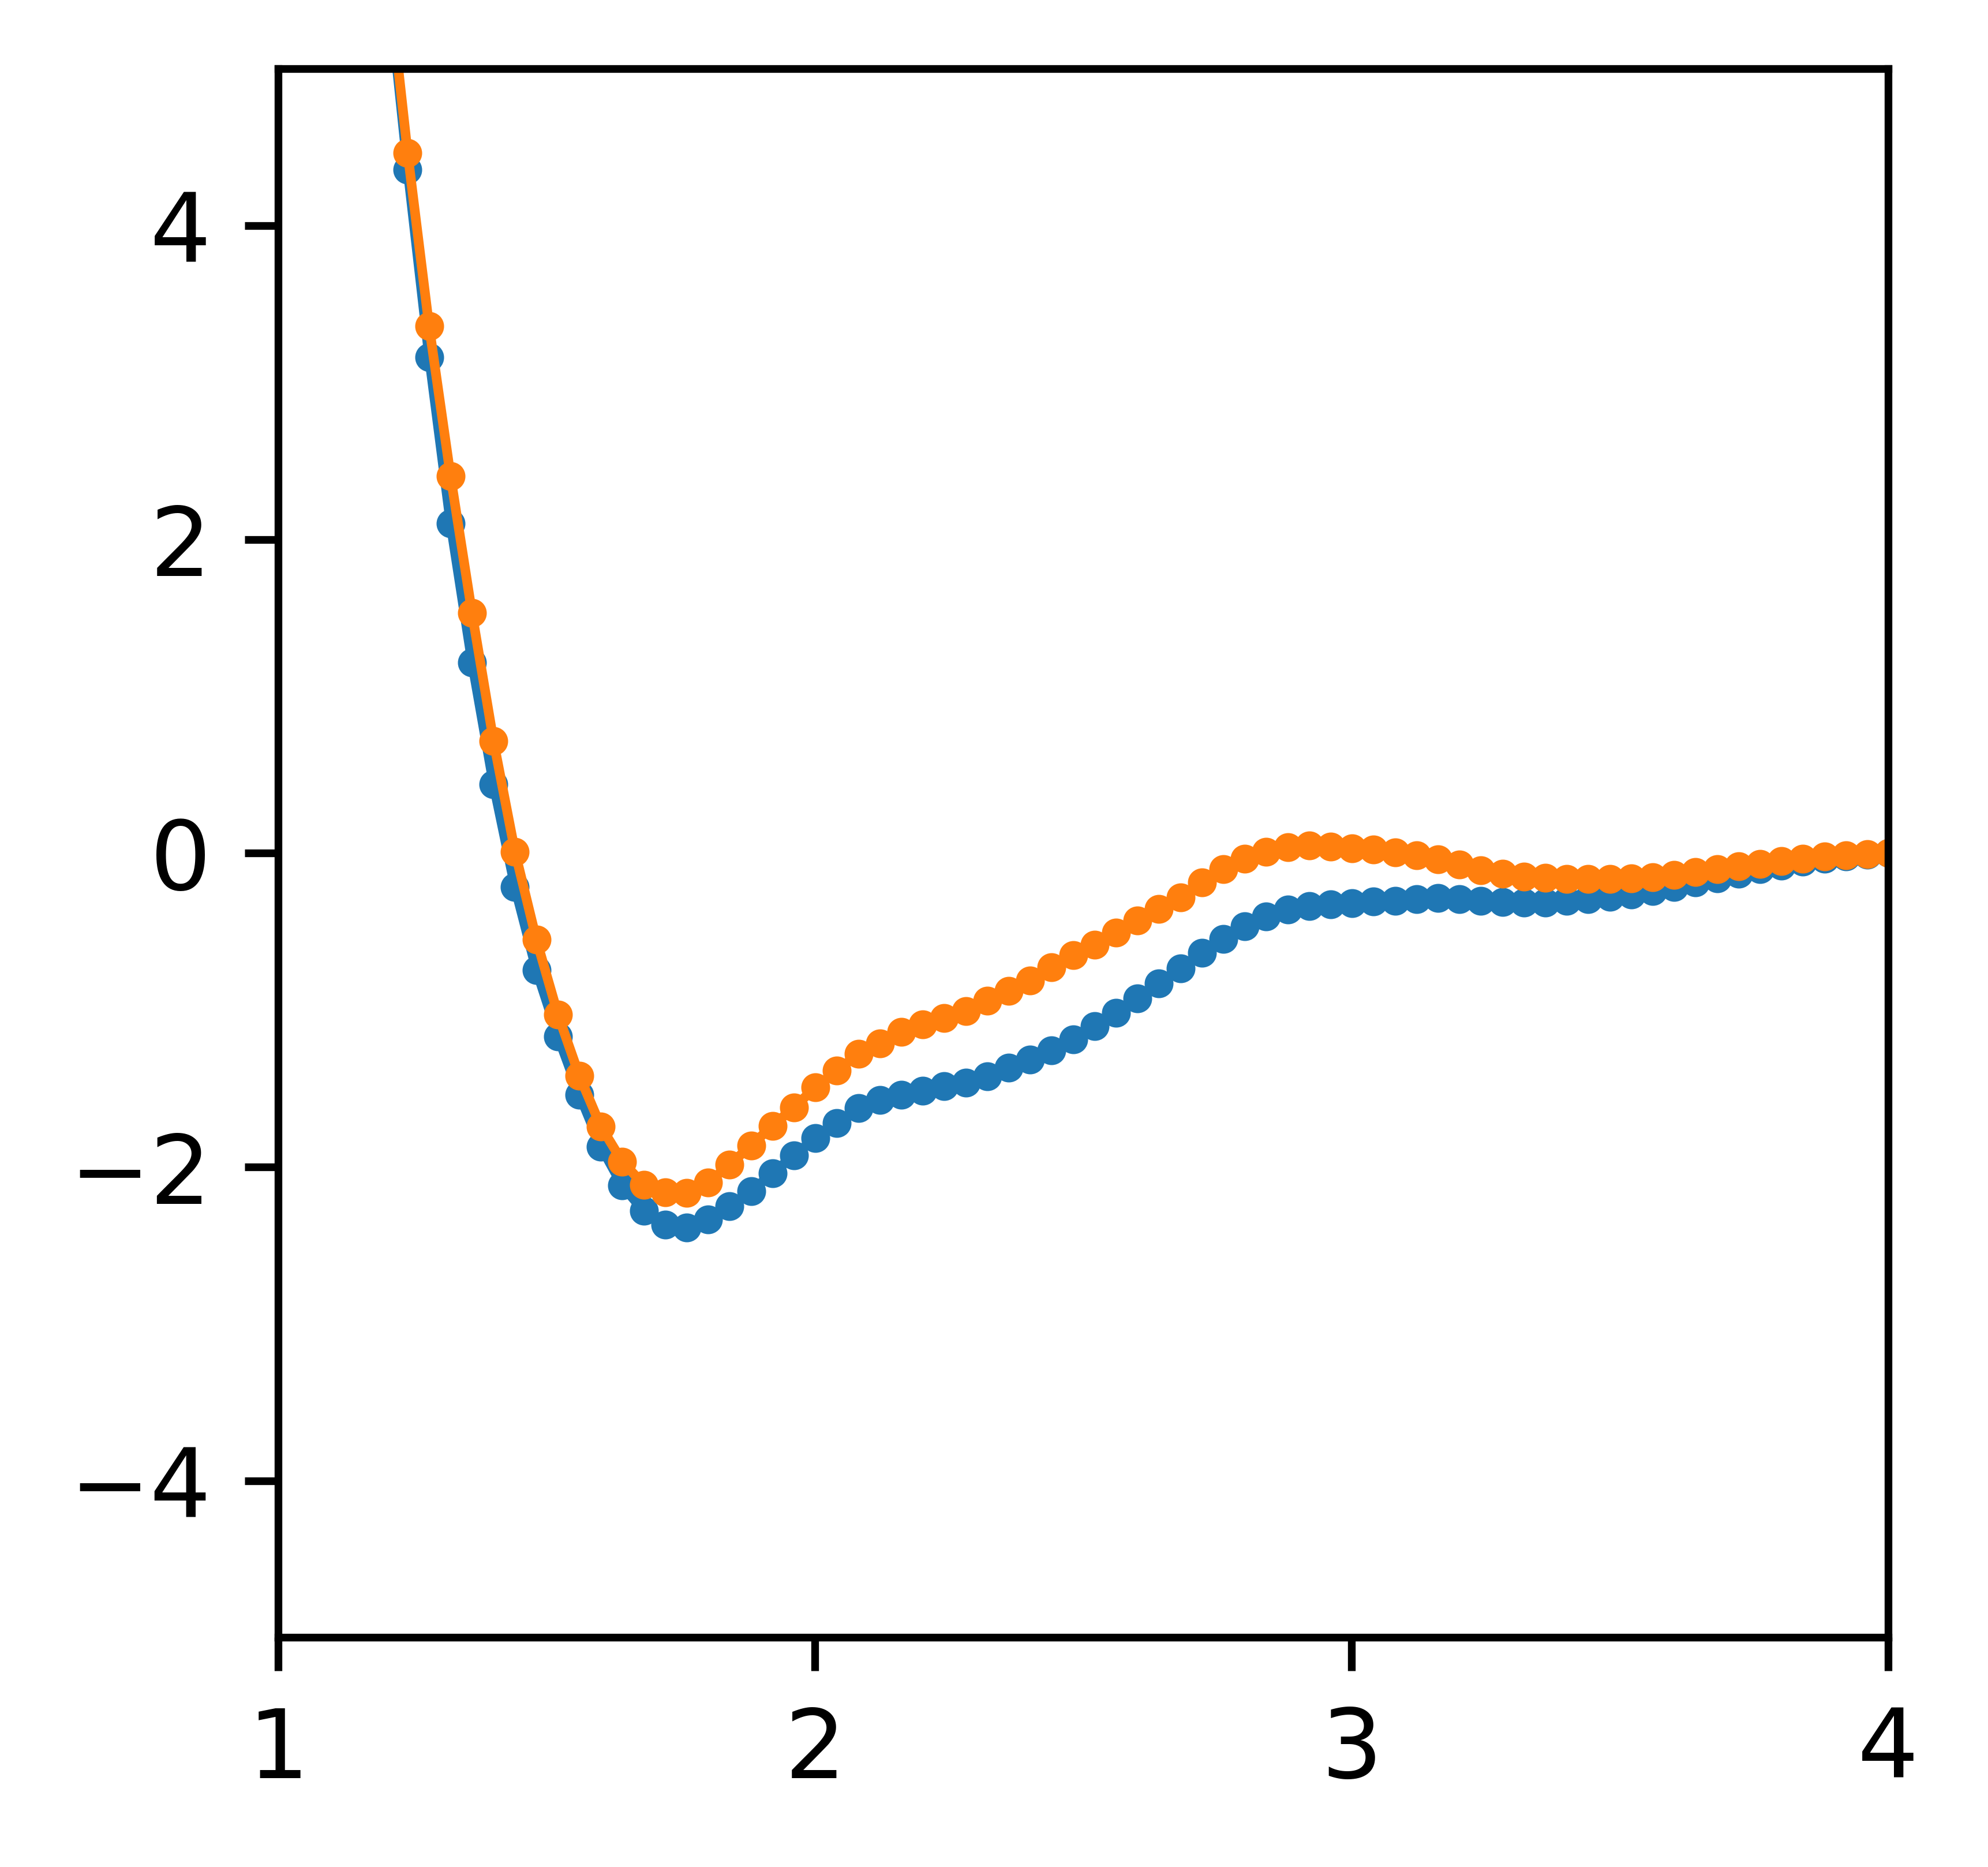

In [56]:
fpath = "/home/chrisjones4/cme/forks/polybinder/polybinder/library/forcefields/"
pair = "E-E"
weak = np.genfromtxt(
    os.path.join(fpath, "harmonic-bonds-weak", f"{pair}_pair.txt")
)
stiff = np.genfromtxt(
    os.path.join(fpath, "harmonic-bonds-stiff", f"{pair}_pair.txt")
)
plt.plot(weak[:,0], weak[:,1], label="weak")
plt.plot(stiff[:,0], stiff[:,1], label="stiff")
plt.xlim(1, 4)
plt.ylim(-5, 5)